In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [39]:
# Loading the dataset
file_path = 'Lifestyle.xlsx'
df = pd.read_excel(file_path)

print(df.head())
print(df.info())
print(df.describe())

   Timestamp  FRUITS_VEGGIES DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0 2015-07-07               3            2               2            5   
1 2015-07-07               2            3               4            3   
2 2015-07-07               2            3               3            4   
3 2015-07-07               3            3              10            3   
4 2015-07-07               5            1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  ...  \
0                  0               5            2         0          1  ...   
1                  8              10            5         2          2  ...   
2                  4              10            3         2          2  ...   
3                 10               7            2         5          2  ...   
4                 10               4            2         4          2  ...   

   SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  SUFFICIENT_INCOME  \
0           

In [40]:
print(df.isnull().sum())

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64


In [41]:
print(df.dtypes)

Timestamp                  datetime64[ns]
FRUITS_VEGGIES                      int64
DAILY_STRESS                       object
PLACES_VISITED                      int64
CORE_CIRCLE                         int64
SUPPORTING_OTHERS                   int64
SOCIAL_NETWORK                      int64
ACHIEVEMENT                         int64
DONATION                            int64
BMI_RANGE                           int64
TODO_COMPLETED                      int64
FLOW                                int64
DAILY_STEPS                         int64
LIVE_VISION                         int64
SLEEP_HOURS                         int64
LOST_VACATION                       int64
DAILY_SHOUTING                      int64
SUFFICIENT_INCOME                   int64
PERSONAL_AWARDS                     int64
TIME_FOR_PASSION                    int64
WEEKLY_MEDITATION                   int64
AGE                                object
GENDER                             object
WORK_LIFE_BALANCE_SCORE           

In [42]:
# Data Preprocessing
age_group_mapping = {
    '21 to 35': 0,
    '36 to 50': 1,
    '51 or more': 2
}
gender_mapping = {
    'Female': 0,
    'Male': 1
}
df['AGE'] = df['AGE'].map(age_group_mapping).astype('Int64')
df['GENDER'] = df['GENDER'].map(gender_mapping).astype('Int64')
selected_columns = ['DAILY_STRESS', 'AGE', 'GENDER', 'SLEEP_HOURS', 'ACHIEVEMENT', 'TIME_FOR_PASSION', 'WORK_LIFE_BALANCE_SCORE', 'DAILY_STEPS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION',]

df_selected = df[selected_columns]
print(df_selected.head())


  DAILY_STRESS  AGE  GENDER  SLEEP_HOURS  ACHIEVEMENT  TIME_FOR_PASSION  \
0            2    1       0            7            2                 0   
1            3    1       0            8            5                 2   
2            3    1       0            8            3                 8   
3            3    2       0            5            2                 2   
4            1    2       0            7            2                 1   

   WORK_LIFE_BALANCE_SCORE  DAILY_STEPS  PLACES_VISITED  CORE_CIRCLE  ...  \
0                    609.5            5               2            5  ...   
1                    655.6            5               4            3  ...   
2                    631.6            4               3            4  ...   
3                    622.7            5              10            3  ...   
4                    663.9            5               3            3  ...   

   SOCIAL_NETWORK  DONATION  BMI_RANGE  TODO_COMPLETED  FLOW  DAILY_SHOUTING  \
0     

            AGE    GENDER   SLEEP_HOURS   ACHIEVEMENT  TIME_FOR_PASSION  \
count   14153.0   15972.0  15972.000000  15972.000000      15972.000000   
mean   0.807956  0.382795      7.042888      4.000751          3.326572   
std    0.796403  0.486084      1.199044      2.755837          2.729293   
min         0.0       0.0      1.000000      0.000000          0.000000   
25%         0.0       0.0      6.000000      2.000000          1.000000   
50%         1.0       0.0      7.000000      3.000000          3.000000   
75%         1.0       1.0      8.000000      6.000000          5.000000   
max         2.0       1.0     10.000000     10.000000         10.000000   

       WORK_LIFE_BALANCE_SCORE   DAILY_STEPS  PLACES_VISITED   CORE_CIRCLE  \
count             15972.000000  15972.000000    15972.000000  15972.000000   
mean                666.751503      5.703606        5.232970      5.508077   
std                  45.019868      2.891013        3.311912      2.840334   
min         

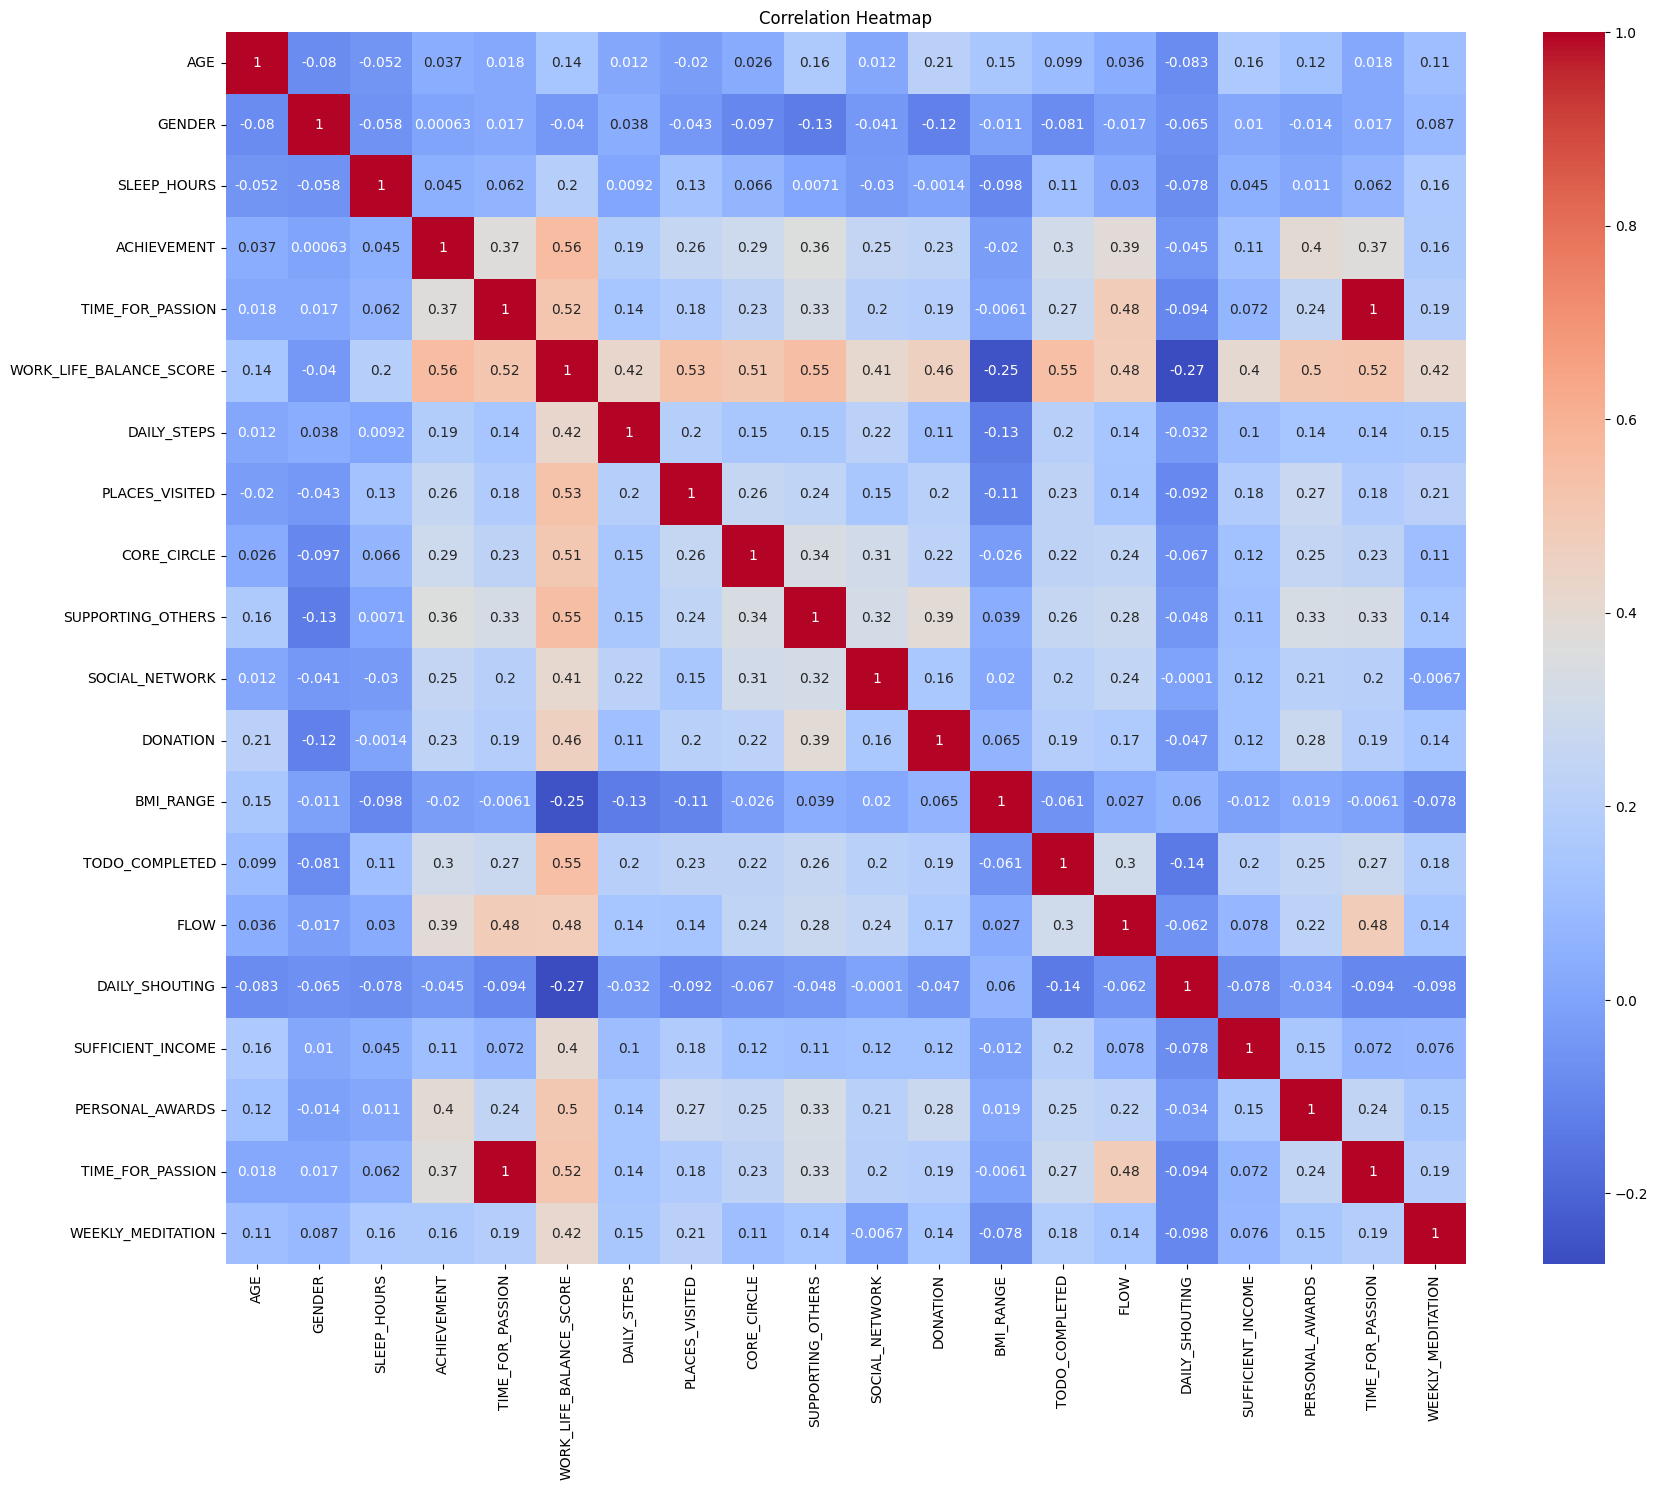

In [43]:
# A correlation heatmap to help us understand the relationships between the features
# Check for missing values
print(df_selected.describe())

# Select only numeric columns for correlation heatmap
numeric_df_selected = df_selected.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_df_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Turn all floats into integers
df_selected = df_selected.fillna(0).map(lambda x: int(x) if isinstance(x, float) else x)

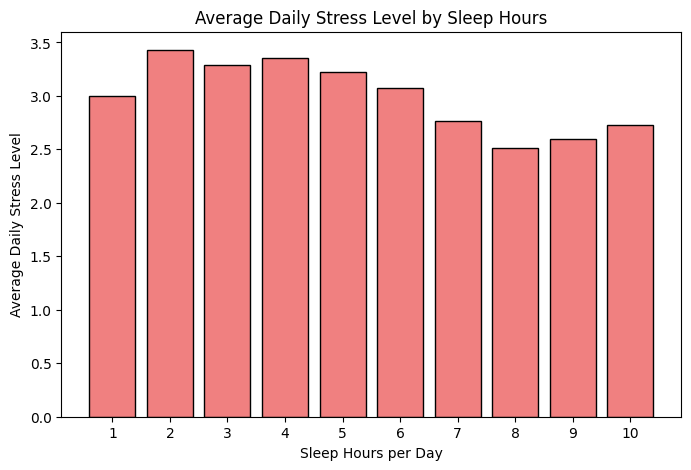

Correlation between DAILY_STRESS and SLEEP_HOURS: -0.15703719939657004


In [44]:
# Daily Stress Level Prediction
# Convert DAILY_STRESS to numeric
df_selected['DAILY_STRESS'] = pd.to_numeric(df_selected['DAILY_STRESS'], errors='coerce')

# Group by SLEEP_HOURS and calculate the average DAILY_STRESS
sleep_stress_grouped = df_selected.groupby('SLEEP_HOURS')['DAILY_STRESS'].mean()

# Bar plot of average DAILY_STRESS by SLEEP_HOURS
plt.figure(figsize=(8, 5))
plt.bar(sleep_stress_grouped.index, sleep_stress_grouped.values, color='lightcoral', edgecolor='black')
plt.title('Average Daily Stress Level by Sleep Hours')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Average Daily Stress Level')
plt.xticks(sleep_stress_grouped.index)
plt.show()

# Scatter plot of Daily Stress vs Sleep Hours
correlation = df_selected['DAILY_STRESS'].corr(df_selected['SLEEP_HOURS'])
print(f"Correlation between DAILY_STRESS and SLEEP_HOURS: {correlation}")

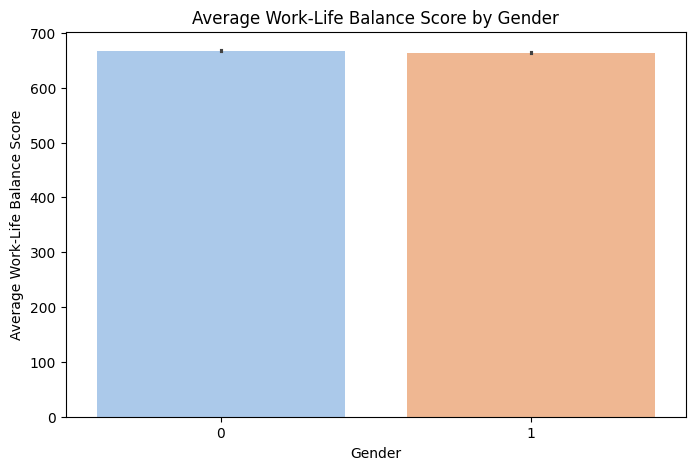

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x='GENDER', y='WORK_LIFE_BALANCE_SCORE', data=df_selected, estimator='mean', hue='GENDER', palette='pastel', legend=False)
plt.title('Average Work-Life Balance Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Work-Life Balance Score')
plt.show()

In [46]:
#Feature Engineering to try and achieve a higher accuracy

# Handle missing values first
imputer = SimpleImputer(strategy='mean')

# Create interaction features after imputing
df_selected['AGE'] = imputer.fit_transform(df_selected[['AGE']])
df_selected['AGE_GENDER'] = df_selected['AGE'] * df_selected['GENDER']
df_selected['SLEEP_ACHIEVEMENT'] = df_selected['SLEEP_HOURS'] * df_selected['ACHIEVEMENT']

# Create polynomial features after ensuring no NaN values
features_for_poly = df_selected[['AGE', 'SLEEP_HOURS', 'ACHIEVEMENT']].copy()
features_for_poly = imputer.fit_transform(features_for_poly)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features_for_poly)
poly_feature_names = poly.get_feature_names_out(['AGE', 'SLEEP_HOURS', 'ACHIEVEMENT'])

# Rename polynomial feature columns to avoid duplicates
df_poly = pd.DataFrame(poly_features, columns=[f'poly_{name}' for name in poly_feature_names])

# Concatenate polynomial features with the original dataframe
df_selected = pd.concat([df_selected, df_poly], axis=1)

# Binning the 'AGE' feature
df_selected['AGE_BINNED'] = pd.cut(df_selected['AGE'].values, bins=[0, 1, 2, 3], labels=['Young', 'Middle-aged', 'Old'])

# One-hot encoding the binned 'AGE' feature
df_selected = pd.get_dummies(df_selected, columns=['AGE_BINNED'], drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['SLEEP_HOURS', 'ACHIEVEMENT', 'DAILY_STEPS']
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

print(df_selected.head())

   DAILY_STRESS  AGE  GENDER  SLEEP_HOURS  ACHIEVEMENT  TIME_FOR_PASSION  \
0           2.0  1.0       0    -0.035769    -0.726028                 0   
1           3.0  1.0       0     0.798254     0.362605                 2   
2           3.0  1.0       0     0.798254    -0.363150                 8   
3           3.0  2.0       0    -1.703817    -0.726028                 2   
4           1.0  2.0       0    -0.035769    -0.726028                 1   

   WORK_LIFE_BALANCE_SCORE  DAILY_STEPS  PLACES_VISITED  CORE_CIRCLE  ...  \
0                      609    -0.243385               2            5  ...   
1                      655    -0.243385               4            3  ...   
2                      631    -0.589295               3            4  ...   
3                      622    -0.243385              10            3  ...   
4                      663    -0.243385               3            3  ...   

   poly_SLEEP_HOURS  poly_ACHIEVEMENT  poly_AGE^2  poly_AGE SLEEP_HOURS  \
0    

In [47]:
# Oulier Detection and removal
# Excluding the 'Timestamp' column from the outlier detection process
df_numeric = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
df_no_outliers = df[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

print(f'Original Data Shape: {df.shape}')
print(f'Data Shape After Removing Outliers: {df_no_outliers.shape}')

Original Data Shape: (15972, 24)
Data Shape After Removing Outliers: (14978, 24)


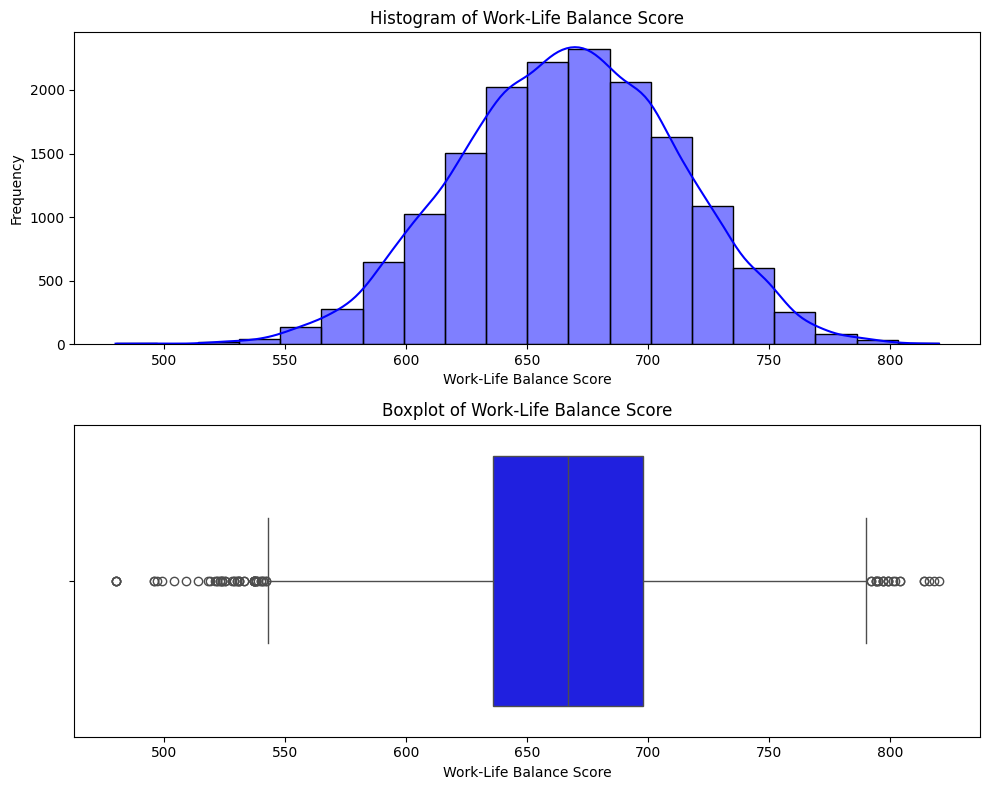

In [48]:
# Visualization: Histogram and Boxplot
plt.figure(figsize=(10, 8))

# Define y
y = df_selected['WORK_LIFE_BALANCE_SCORE']

# Histogram
plt.subplot(2, 1, 1)
sns.histplot(y, kde=True, color='blue', bins=20)
plt.title('Histogram of Work-Life Balance Score')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=y, color='blue', orient='h')
plt.title('Boxplot of Work-Life Balance Score')
plt.xlabel('Work-Life Balance Score')

# Show the plots
plt.tight_layout()
plt.show()

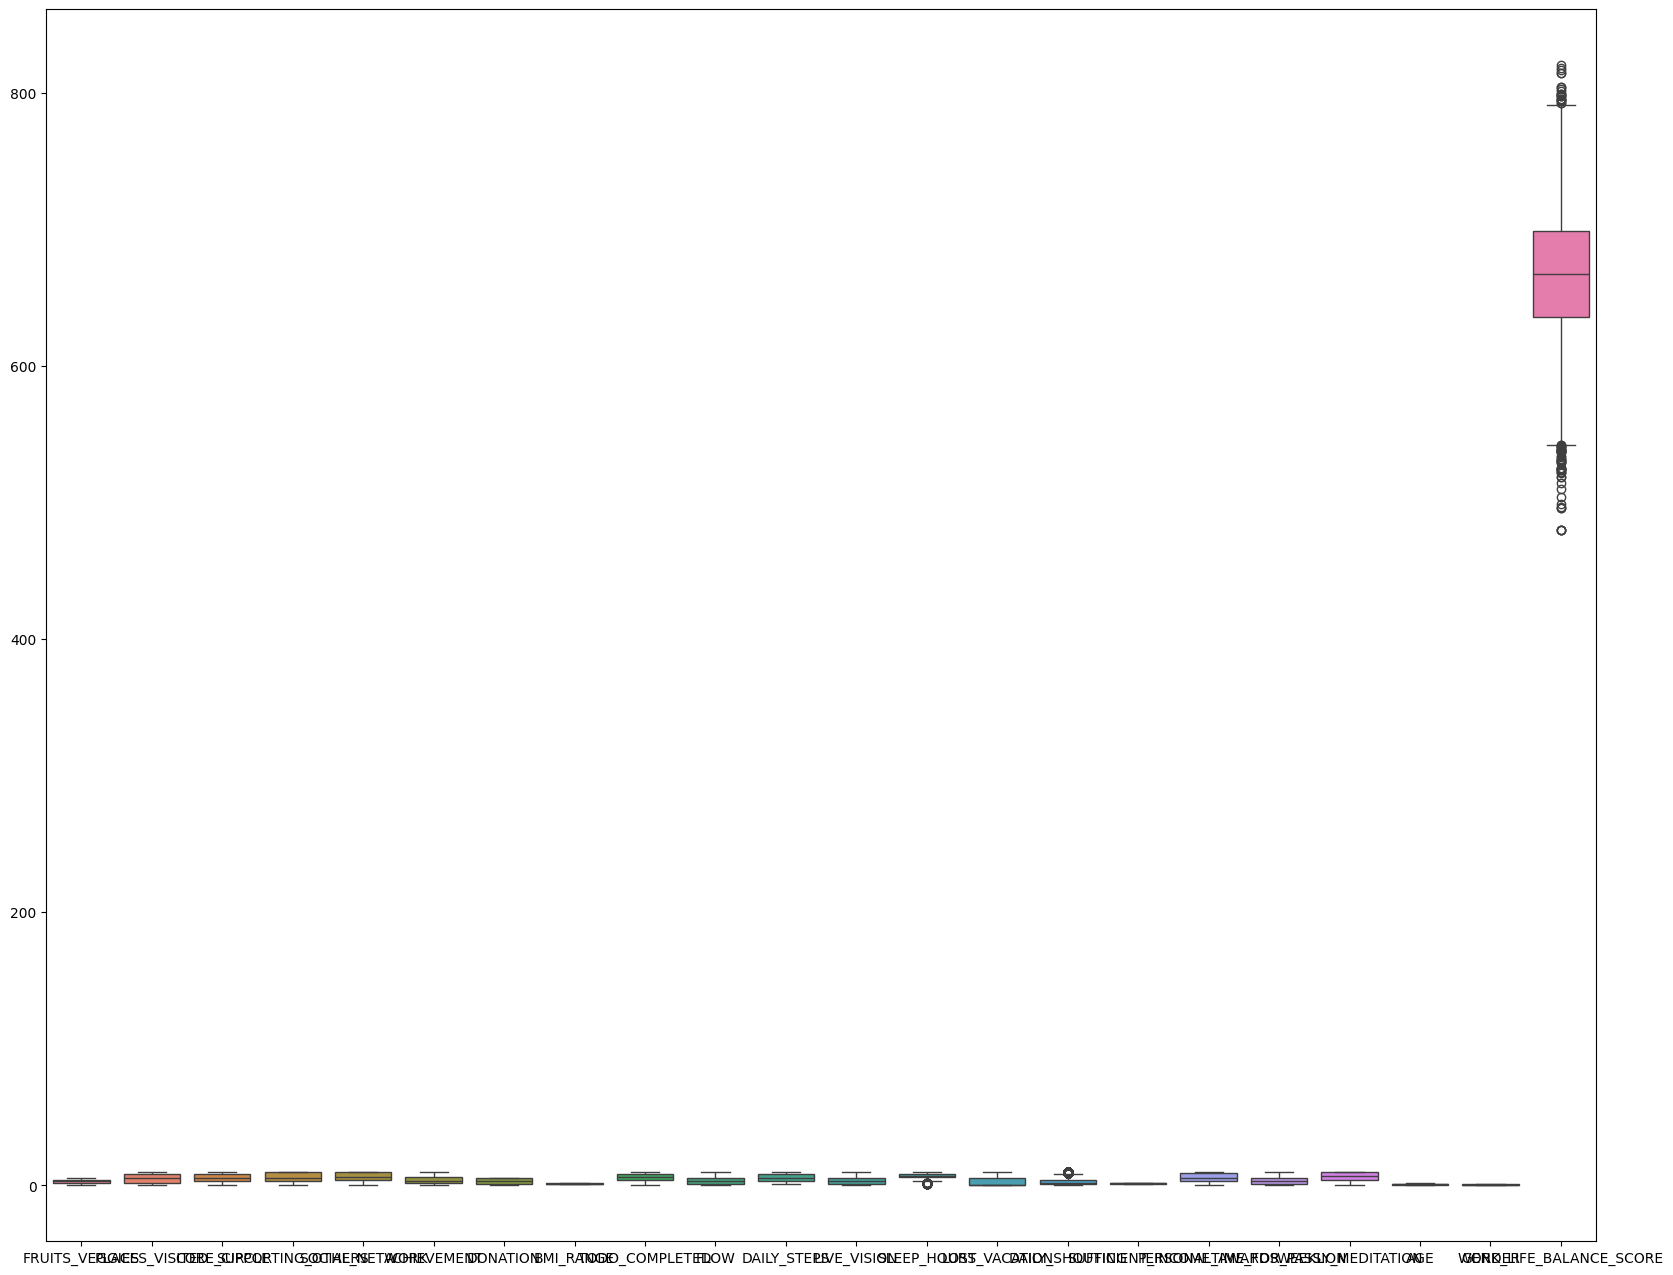

In [49]:
# Boxplot to visualize outliers
plt.figure(figsize=(20, 16))
sns.boxplot(data=df)
plt.show()

In [50]:
# Linear Regression After Data Preprocessing and Oulier Removal
df_numeric = df.select_dtypes(include=[np.number]) # I removed the 'Timestamp' column due to it interfering with the model (again)

# Define X and y
X = df_numeric.drop(['WORK_LIFE_BALANCE_SCORE', 'GENDER'], axis=1)
y = df_numeric['WORK_LIFE_BALANCE_SCORE']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluation
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

# Cross-validation
cv_scores = cross_val_score(regressor, X_imputed, y, cv=5)
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score: {cv_scores.mean()}')

MSE: 17.681536918028677
R2 Score: 0.9910997769083725
Cross-validation R² scores: [0.99167401 0.99158233 0.99148139 0.99090821 0.99116047]
Mean R² score: 0.9913612824923834


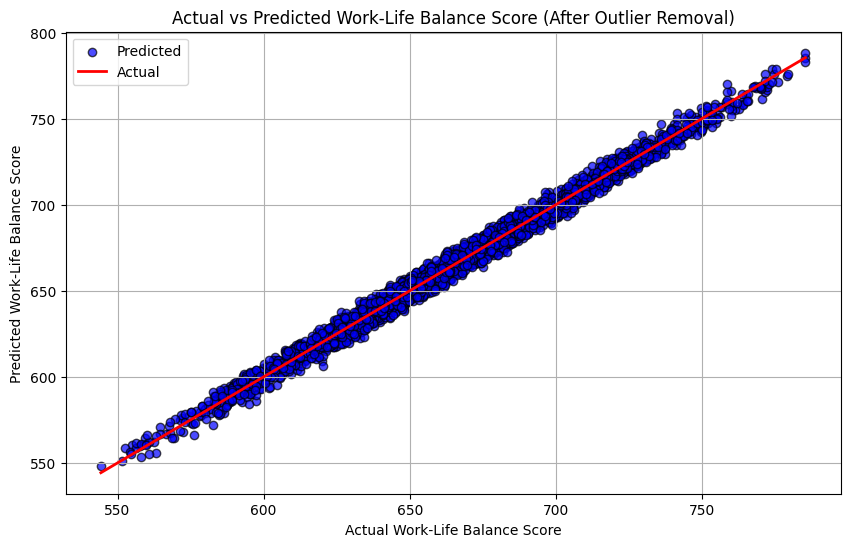

In [51]:
# Define X and y after outlier removal
X_no_outliers = df_no_outliers.select_dtypes(include=[np.number]).drop(['WORK_LIFE_BALANCE_SCORE', 'GENDER'], axis=1)
y_no_outliers = df_no_outliers['WORK_LIFE_BALANCE_SCORE']

# Impute missing values
X_no_outliers_imputed = imputer.fit_transform(X_no_outliers)

# Split into train and test sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers_imputed, y_no_outliers, test_size=0.2, random_state=42)

# Initialize Linear Regression model
regressor_no_outliers = LinearRegression()

# Fit the model
regressor_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predictions
y_pred_no_outliers = regressor_no_outliers.predict(X_test_no_outliers)

# Plotting Actual vs Predicted values after outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(y_test_no_outliers, y_pred_no_outliers, color='blue', edgecolor='k', alpha=0.7, label='Predicted')
plt.plot([y_test_no_outliers.min(), y_test_no_outliers.max()], [y_test_no_outliers.min(), y_test_no_outliers.max()], color='red', linewidth=2, label='Actual')
plt.title('Actual vs Predicted Work-Life Balance Score (After Outlier Removal)')
plt.xlabel('Actual Work-Life Balance Score')
plt.ylabel('Predicted Work-Life Balance Score')
plt.legend()
plt.grid(True)
plt.show()

Variance: 1986.6397432960832
Standard Deviation: 44.57173704598109
Range: 334.5
Interquartile Range (IQR): 62.0


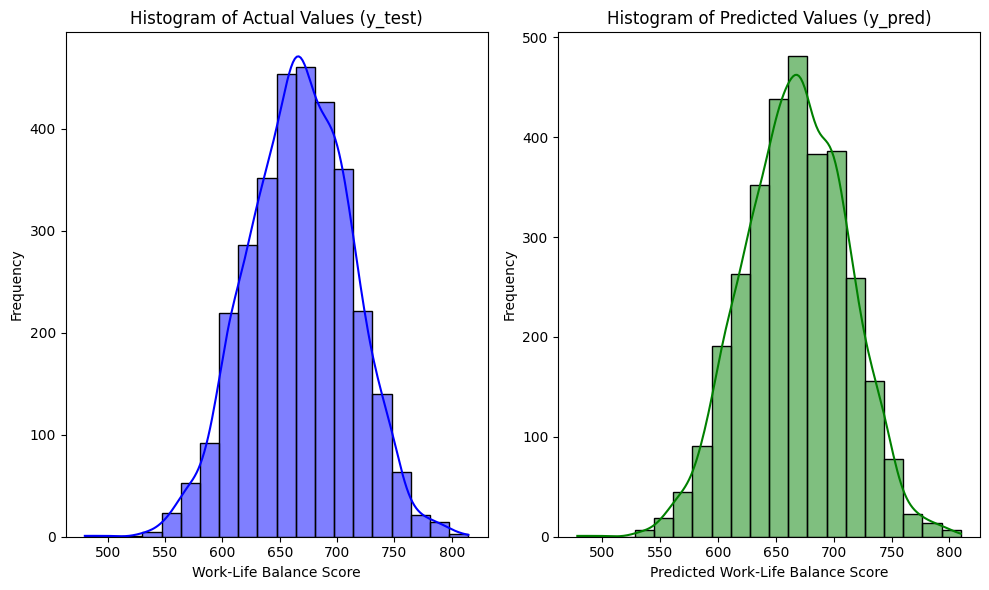

In [52]:
# Regular Calculations

# Variance and Standard Deviation:
variance = np.var(y_test)  # Variance
std_dev = np.std(y_test)  # Standard Deviation

# Measures of Spread
range_value = np.ptp(y_test)
iqr = stats.iqr(y_test)

# Display the calculations
print(f'Variance: {variance}')
print(f'Standard Deviation: {std_dev}')
print(f'Range: {range_value}')
print(f'Interquartile Range (IQR): {iqr}')

# Visualization: Histograms
plt.figure(figsize=(10, 6))

# Actual Values Histogram
plt.subplot(1, 2, 1)
sns.histplot(y_test, kde=True, color='blue', bins=20)
plt.title('Histogram of Actual Values (y_test)')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Frequency')

# Predicted Values Histogram
plt.subplot(1, 2, 2)
sns.histplot(y_pred, kde=True, color='green', bins=20)
plt.title('Histogram of Predicted Values (y_pred)')
plt.xlabel('Predicted Work-Life Balance Score')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [53]:
# Decision Tree Classifier
# Drop the target column
X = df_selected.drop(['AGE', 'WORK_LIFE_BALANCE_SCORE',], axis=1)
y = df_selected['WORK_LIFE_BALANCE_SCORE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier with sample weights
clf_weighted = DecisionTreeClassifier(random_state=42)

# Define sample weights
sample_weights_train = np.ones(len(y_train))

# Fit the model with sample weights
clf_weighted.fit(X_train, y_train, sample_weight=sample_weights_train)

# Predictions
y_pred_weighted = clf_weighted.predict(X_test)

# Evaluation
print(accuracy_score(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted, zero_division=0))

0.08200312989045383
              precision    recall  f1-score   support

         480       0.00      0.00      0.00         1
         497       0.00      0.00      0.00         0
         499       0.00      0.00      0.00         1
         504       0.00      0.00      0.00         0
         514       0.00      0.00      0.00         0
         521       0.00      0.00      0.00         0
         522       0.00      0.00      0.00         0
         524       0.00      0.00      0.00         0
         525       0.00      0.00      0.00         0
         529       0.00      0.00      0.00         1
         531       0.00      0.00      0.00         0
         533       0.00      0.00      0.00         2
         538       0.33      1.00      0.50         1
         539       0.00      0.00      0.00         0
         542       0.00      0.00      0.00         1
         543       0.00      0.00      0.00         0
         546       0.00      0.00      0.00         1
       

In [54]:
# Cross-validation for Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

c:\Users\Legion\Desktop\WorkStation\Projects\LifeStyleAnalysis\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.0372457  0.04256651 0.03318723 0.02442079 0.02222918]
Mean cross-validation score: 0.03192988026258154


MSE: 501.1610947930574
R2 Score: 0.7292376119885311


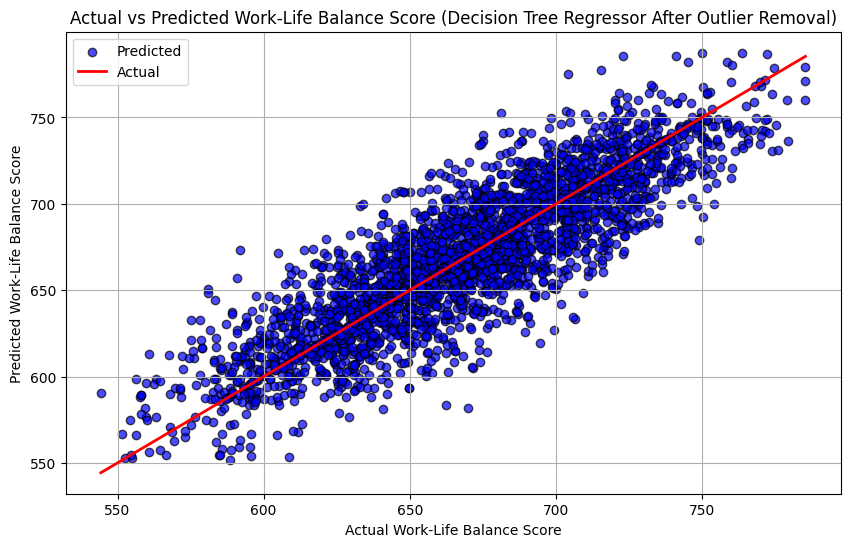

In [55]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor After Outlier Removal

# Define X and y after outlier removal
X_no_outliers = df_no_outliers.select_dtypes(include=[np.number]).drop(['WORK_LIFE_BALANCE_SCORE', 'GENDER'], axis=1)
y_no_outliers = df_no_outliers['WORK_LIFE_BALANCE_SCORE']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_no_outliers_imputed = imputer.fit_transform(X_no_outliers)

# Train-test split
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers_imputed, y_no_outliers, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
regressor_no_outliers = DecisionTreeRegressor(random_state=42)

# Fit the model
regressor_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predictions
y_pred_no_outliers = regressor_no_outliers.predict(X_test_no_outliers)

# Evaluation
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_no_outliers, y_pred_no_outliers, color='blue', edgecolor='k', alpha=0.7, label='Predicted')
plt.plot([y_test_no_outliers.min(), y_test_no_outliers.max()], [y_test_no_outliers.min(), y_test_no_outliers.max()], color='red', linewidth=2, label='Actual')
plt.title('Actual vs Predicted Work-Life Balance Score (Decision Tree Regressor After Outlier Removal)')
plt.xlabel('Actual Work-Life Balance Score')
plt.ylabel('Predicted Work-Life Balance Score')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Linear Regression ((((without Cleaning Outliers))))
# Define X and y
X = df_selected.drop(['WORK_LIFE_BALANCE_SCORE', 'GENDER'], axis=1)
y = df_selected['WORK_LIFE_BALANCE_SCORE']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Evaluation
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

MSE: 80.13558131653797
R2 Score: 0.9596688500866233


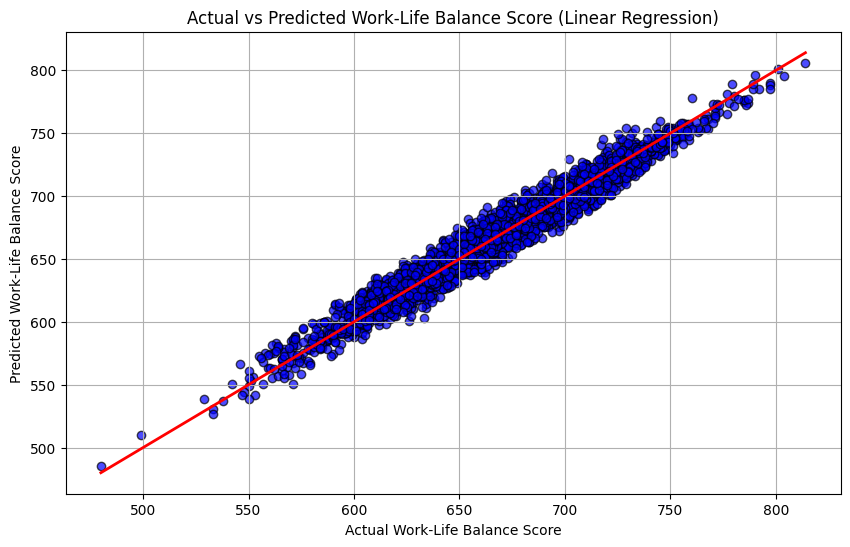

In [57]:
# Plotting Actual vs Predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Work-Life Balance Score (Linear Regression)')
plt.xlabel('Actual Work-Life Balance Score')
plt.ylabel('Predicted Work-Life Balance Score')
plt.grid(True)
plt.show()

In [58]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

lin_reg = LinearRegression()

cv_scores = cross_val_score(lin_reg, X_imputed, y, cv=5, scoring='r2')  #  R² for regression

print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score: {cv_scores.mean():.4f}')

Cross-validation R² scores: [0.96053173 0.96067389 0.96338892 0.95914507 0.95893753]
Mean R² score: 0.9605


In [59]:
# Variance of the target variable
variance = y.var()
print(f'Variance of the target variable: {variance:.4f}')

Variance of the target variable: 2027.1652


In [60]:
#Variance of the predicted errors
errors = y - regressor.predict(X_imputed)
errors_variance = errors.var()
print(f'Variance of the errors: {errors_variance:.4f}')

Variance of the errors: 79.2969


In [61]:
# Standard Deviation
variance = 80.13558131653797  # MSE or any variance value
std_dev = np.sqrt(variance)

print(f'Standard Deviation: {std_dev:.4f}')

Standard Deviation: 8.9518


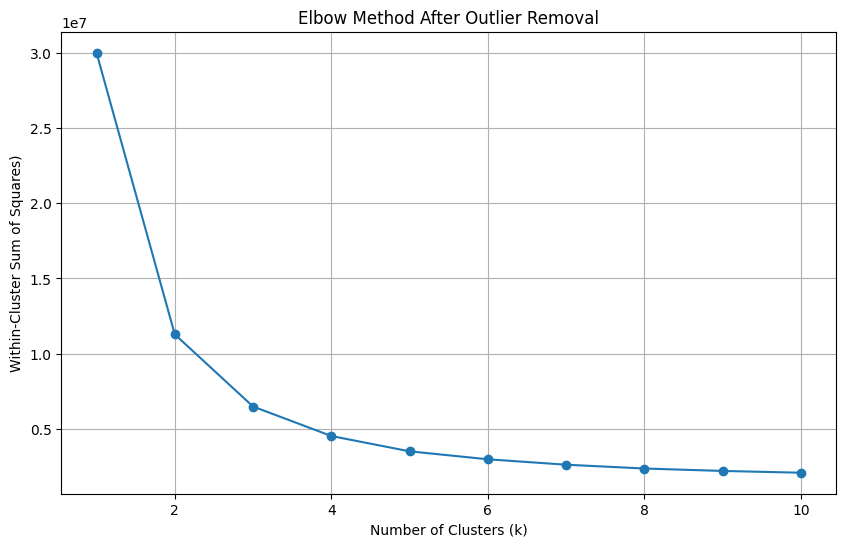

In [62]:
# Impute missing values in df_no_outliers
imputer = SimpleImputer(strategy='mean')
X_no_outliers = df_no_outliers.select_dtypes(include=[np.number])
X_no_outliers_imputed = imputer.fit_transform(X_no_outliers)

# Calculate WCSS (Within-Cluster Sum of Squares) after outlier removal
wcss_no_outliers = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_no_outliers_imputed)
    wcss_no_outliers.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_no_outliers, marker='o')
plt.title('Elbow Method After Outlier Removal')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

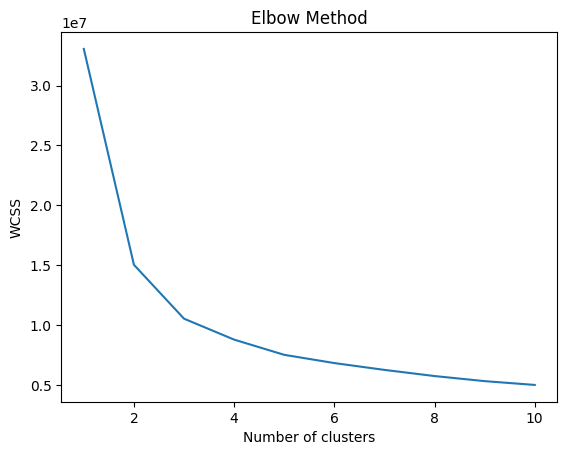

   DAILY_STRESS  AGE  GENDER  SLEEP_HOURS  ACHIEVEMENT  TIME_FOR_PASSION  \
0           2.0  1.0       0    -0.035769    -0.726028                 0   
1           3.0  1.0       0     0.798254     0.362605                 2   
2           3.0  1.0       0     0.798254    -0.363150                 8   
3           3.0  2.0       0    -1.703817    -0.726028                 2   
4           1.0  2.0       0    -0.035769    -0.726028                 1   

   WORK_LIFE_BALANCE_SCORE  DAILY_STEPS  PLACES_VISITED  CORE_CIRCLE  ...  \
0                      609    -0.243385               2            5  ...   
1                      655    -0.243385               4            3  ...   
2                      631    -0.589295               3            4  ...   
3                      622    -0.243385              10            3  ...   
4                      663    -0.243385               3            3  ...   

   poly_ACHIEVEMENT  poly_AGE^2  poly_AGE SLEEP_HOURS  poly_AGE ACHIEVEMENT  \
0

In [63]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# KMeans Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means with optimal clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_imputed)

# Assign clusters to the original dataframe
df_selected['Cluster'] = clusters

# Display a sample of the data with clusters
print(df_selected.head())